In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import ast
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Survey.csv", sep=",")

In [3]:
def getAttention(arr):
    count = 0
    perception = 0.35
    for i in arr:
        if i <= perception:
            count += 1
    return count/len(arr)

In [4]:
def getLongPerception(arr, group):
    index = [0,5,10,15]
    perception = 0
    if group == 'Game+1':
        index = [0,5,10,15]
    elif group == 'Game+2':
        index = [4,9,14,19]
    for i in index:
        perception += getAttention(arr[i])
    return perception/4

In [5]:
def getShortPerception(arr, group):
    index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    perception = 0
    if group == 'Game+1':
        index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    elif group == 'Game+2':
        index = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
    for i in index:
        perception += getAttention(arr[i])
    return perception/16

In [6]:
def getLong(arr, group):
    index = [0,5,10,15]
    new_arr = []
    if group == 'Game+1':
        index = [0,5,10,15]
    elif group == 'Game+2':
        index = [4,9,14,19]
    for i in index:
        new_arr.append(arr[i])
    return new_arr

In [7]:
def getShort(arr, group):
    index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    new_arr = []
    if group == 'Game+1':
        index = [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19]
    elif group == 'Game+2':
        index = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
    for i in index:
        new_arr.append(arr[i])
    return new_arr

In [8]:
longAvgT1 = []
shortAvgT1 = []
longAvgT2 = []
shortAvgT2 = []
group1_long = []
group1_short = []
group2_long = []
group2_short = []
for i in range(len(df)):
    tracking = ast.literal_eval(df['Eye Tracking'][i])
    group_id = df['Game option'][i]
    if group_id == 'Game+1':
        group1_long.append(getLong(tracking,group_id))
        group1_short.append(getShort(tracking,group_id))
        longAvgT1.append(getLongPerception(tracking,group_id))
        shortAvgT1.append(getShortPerception(tracking,group_id))
    elif group_id == 'Game+2':
        group2_long.append(getLong(tracking,group_id))
        group2_short.append(getShort(tracking,group_id))
        longAvgT2.append(getLongPerception(tracking,group_id))
        shortAvgT2.append(getShortPerception(tracking,group_id))

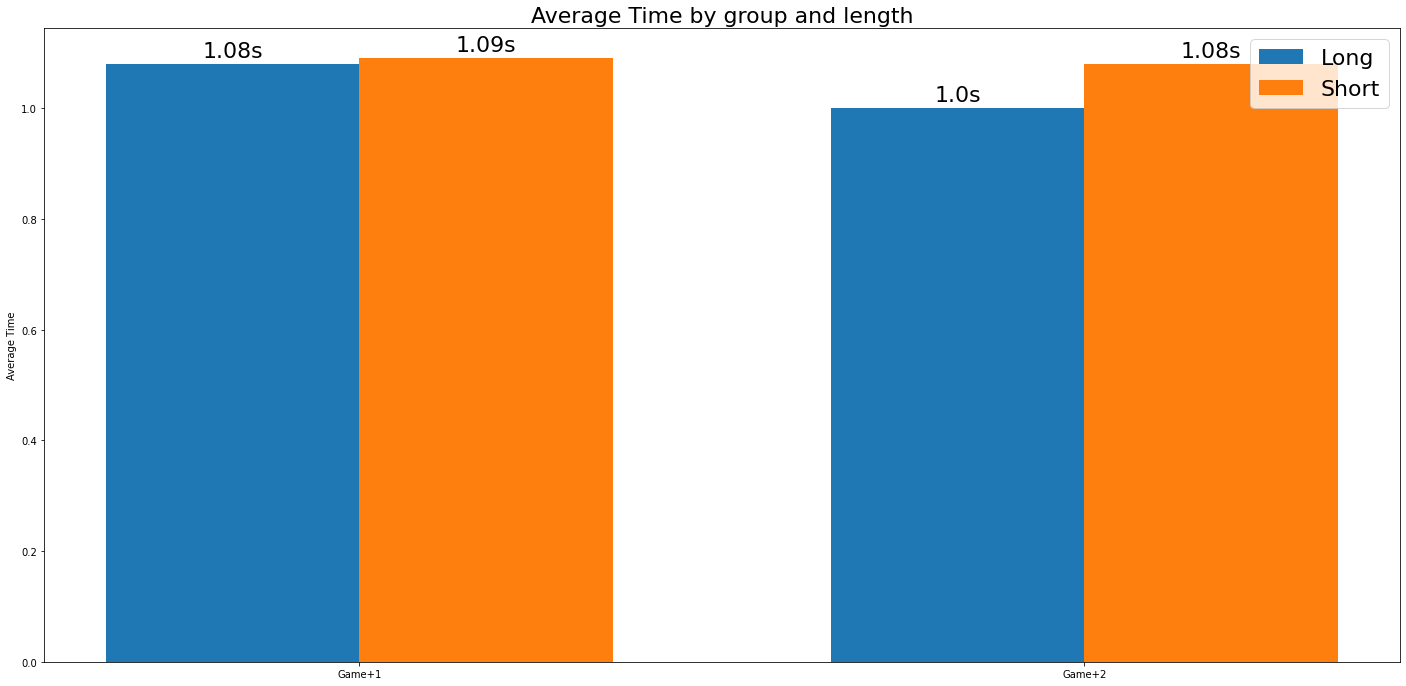

In [9]:
longAT1 = np.array(longAvgT1)
shortAT1 = np.array(shortAvgT1)
longAT2 = np.array(longAvgT2)
shortAT2 = np.array(shortAvgT2)

group_labels = ['Game+1','Game+2']
x = np.arange(len(group_labels))
width = 0.35

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22) 
rects1 = ax.bar(x - width/2, np.around([longAT1.mean()*5, longAT2.mean()*5],2), width, label='Long')
rects2 = ax.bar(x + width/2, np.around([shortAT1.mean()*5, shortAT2.mean()*5],2), width, label='Short')

ax.set_ylabel('Average Time')
ax.set_title('Average Time by group and length')
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}s'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

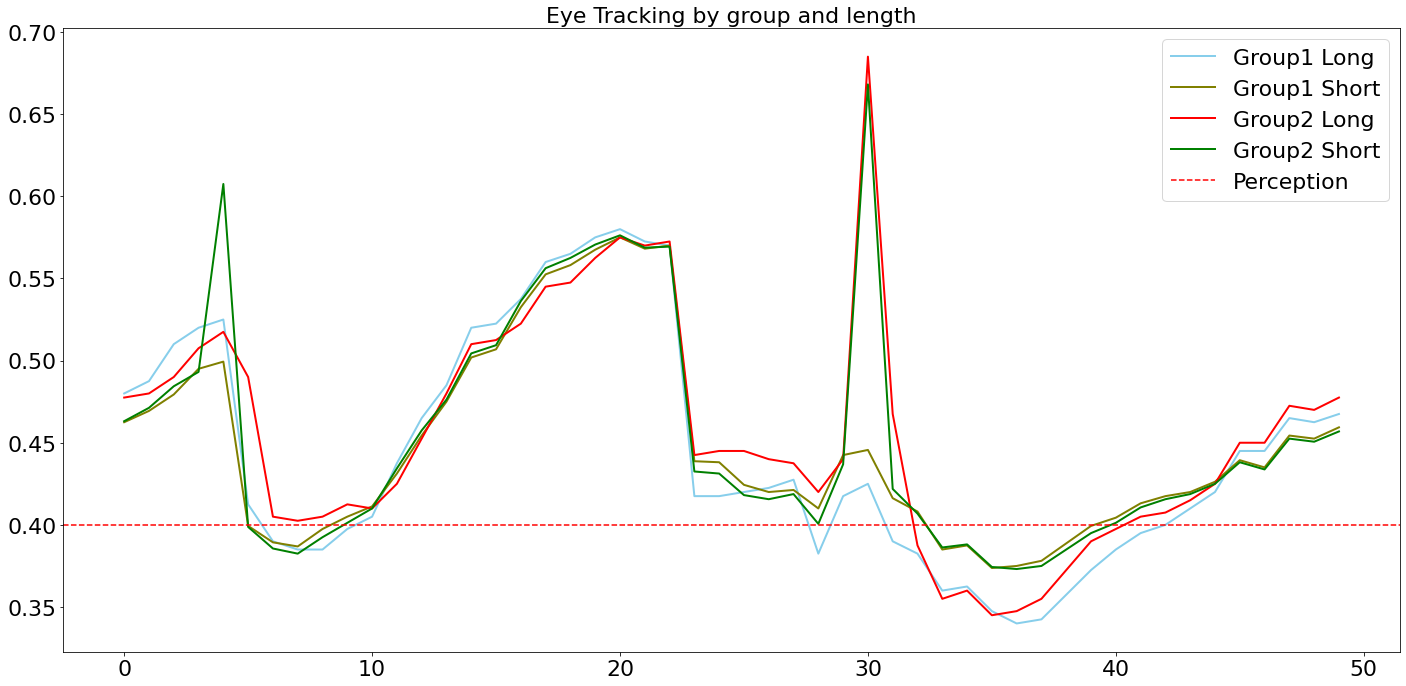

In [10]:
tracking_long1 = np.array(group1_long)
tracking_short1 = np.array(group1_short)
tracking_long2 = np.array(group2_long)
tracking_short2 = np.array(group2_short)
df=pd.DataFrame({'x': range(0,50), 'Group1 Long': tracking_long1.mean(axis=(0,1)), 'Group1 Short': tracking_short1.mean(axis=(0,1)), 'Group2 Long': tracking_long2.mean(axis=(0,1)), 'Group2 Short': tracking_short2.mean(axis=(0,1)) })
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"]= 22
plt.rcParams["legend.loc"] = 'upper right' 
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=22)  
plt.title("Eye Tracking by group and length") 
plt.plot( 'x', 'Group1 Long', data=df, marker='', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'x', 'Group1 Short', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'Group2 Long', data=df, marker='', color='red', linewidth=2)
plt.plot( 'x', 'Group2 Short', data=df, marker='', color='green', linewidth=2)
plt.axhline(y=0.4, color='r', linestyle='--', label='Perception')
plt.legend(['Group1 Long', 'Group1 Short', 'Group2 Long', 'Group2 Short','Perception'])
fig.tight_layout()
plt.show()